In [1]:
import socket
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd

from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu
import math
from datetime import datetime, timedelta
import cutax
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2

#import importlib
#importlib.reload(cutax)

/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/paramiko-2.10.4-py3.8.egg/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
/home/valerioda/software/cutax/cutax/cuts/s2_width.py:580: UserWarning: WARNING! You are fetching S2Widh, whih is only a placeholder from the past!
  warnings.warn("WARNING! You are fetching S2Widh, whih is only a placeholder from the past!")


In [2]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.13,/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/b...,None
1,strax,1.2.2,/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/l...,None
2,straxen,1.7.0,/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/l...,None
3,cutax,1.9.0,/home/valerioda/software/cutax/cutax,branch:s2width_file_refactor | 52c2aba


In [3]:
st = cutax.contexts.xenonnt_v8(cut_list=[cutax.cut_lists.basic.BasicCuts,  cutax.cut_lists.s2width_test.S2Width])
#cutax.cut_lists.science.LowER
#cutax.cut_lists.science.WIMP
#config = st.show_config('cut_s2_width_strict')
#mask = (config['option']=='diffusion_constant')
#config[mask]
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')

In [4]:
dsets = st.select_runs(include_tags='*sr0*',run_mode='tpc_radon',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
rn_runs = np.array(dsets['name'])

/home/valerioda/software/cutax/cutax/cuts/s2_width.py:580: UserWarning: WARNING! You are fetching S2Width, whih is only a placeholder from the past!
  warnings.warn("WARNING! You are fetching S2Widh, whih is only a placeholder from the past!")
[autoreload of cutax.cuts.s2_width failed: Traceback (most recent call last):
  File "/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 310, in update_class
    old_obj = get

In [6]:
ev = wcu.merge_runs_cutax(st,rn_runs[:5])
ev = ev[wcu.all_cuts(ev)]
ev = ev[FiducialVolume.cut_by(ev)]

/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/home/valerioda/software/cutax/cutax/cuts/s1_width.py:29: RuntimeWarning: invalid value encountered in power
  ret = p0 / (x ** p1) + p2 + p3 * x ** p4
/home/valerioda/software/cutax/cutax/cuts/s1_width.py:35: RuntimeWarning: invalid value encountered in power
  ret =  p0 * np.power(x, p1) * np.exp(-p2 * x) + p3 + p4 * x
/home/v

Reading runs from 024023 to 024075


/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/home/valerioda/software/cutax/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/home/valerioda/software/cutax/cutax/cuts/s1_width.py:29: RuntimeWarning: invalid value encountered in power
  ret = p0 / (x ** p1) + p2 + p3 * x ** p4
/home/valerioda/software/cutax/cutax/cuts/s1_width.py:35: RuntimeWarning: invalid value encountered in power
  ret =  p0 * np.power(x, p1) * np.exp(-p2 * x) + p3 + p4 * x
/home/v

Total events 17710
Events near 3014
Events after cut_s2_width_wire_modeled_wimps from cutax 2578
Events after S2WidthCut wire modeled (local) 2575


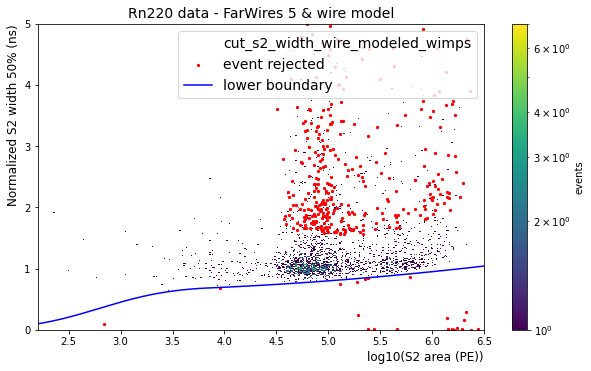

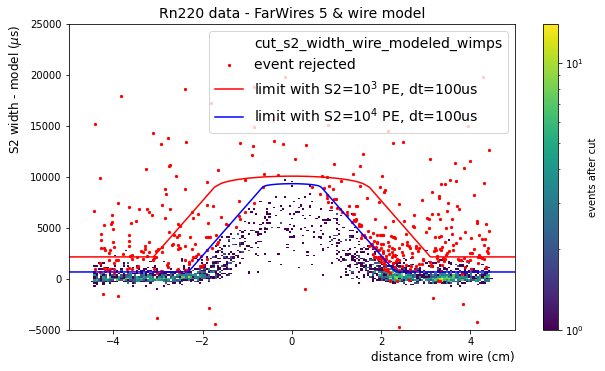

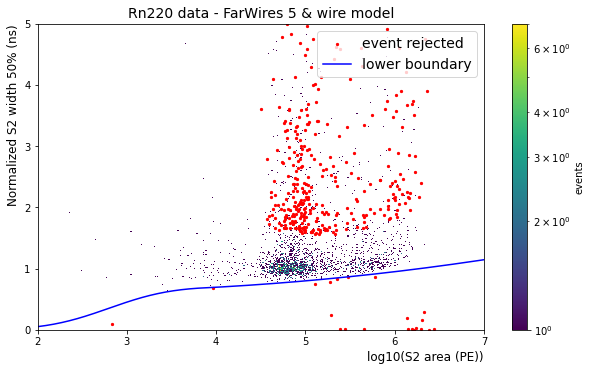

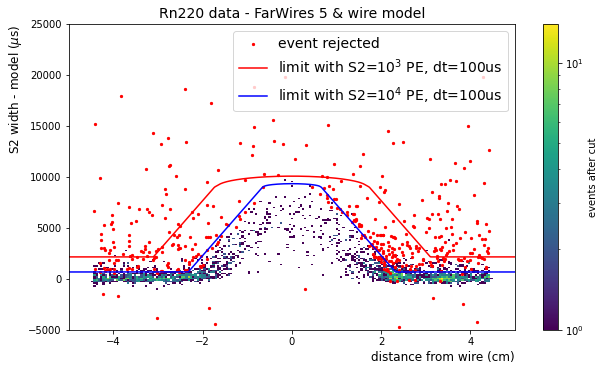

In [63]:
quantile_par = ((0.70507915,  2.80001544, 1.10057148 ), (4.43451121,  1.84825809, 2.15736571, 1.2112417 ))
parabola_par = ((0.02292279, -0.10215068,  0.73768366), (0.11170658, -1.12877236,  4.10119736) )
wcu.plot_cut_s2_wdith(ev,quantile_par,parabola_par, arange = (2.2,6.5),wrange =(0,5),
                      wires='near',drange=(-5000,25000), wire_model=1,
                      title='Rn220 data - FarWires 5 & wire model',
                      name = 'rn220_mod_',
                      cut='cut_s2_width_wire_modeled_wimps')

Total events 17710
Events near 3014
Events after cut_s2_width_wire_modeled_low_er from cutax 2576
Events after S2WidthCut wire modeled (local) 2572


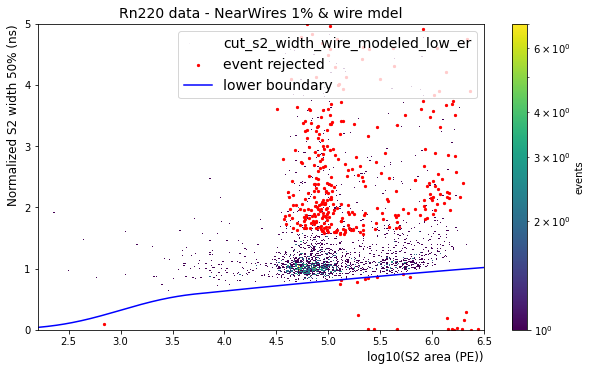

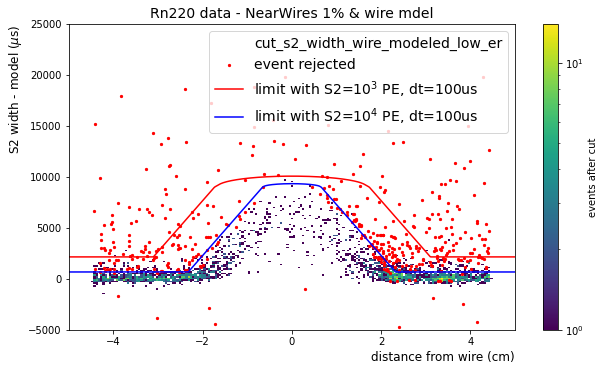

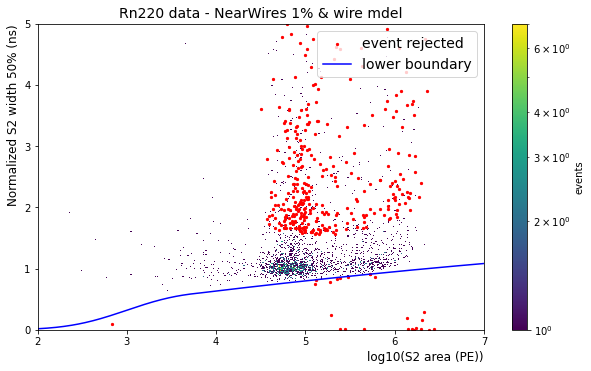

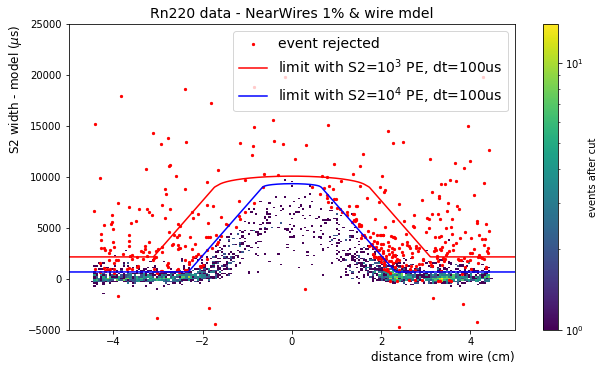

In [64]:
quantile_par = (( 0.63734546, 2.99678884, 1.03246656 ), ( 4.43451121, 1.84825809, 2.15736571, 1.2112417 ) )
parabola_par = ((-0.00798012,  0.23778128, -0.1894035), (0.11170658, -1.12877236,  4.10119736) )
wcu.plot_cut_s2_wdith(ev,quantile_par,parabola_par, arange = (2.2,6.5), wrange =(0,5),
                      wires='near',drange=(-5000,25000), wire_model=1,
                      title='Rn220 data - NearWires 1% & wire mdel',
                      name = 'rn220_mod_',
                      cut='cut_s2_width_wire_modeled_low_er')

Total events 17710
Events far 14696
Events after cut_s2_width_wimps from cutax 11395


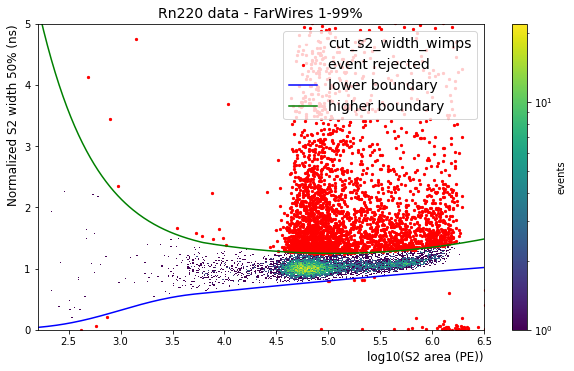

In [58]:
quantile_par = (( 0.63734546, 2.99678884, 1.03246656 ), ( 4.43451121, 1.84825809, 2.15736571, 1.2112417 ) )
parabola_par = ((-0.00798012,  0.23778128, -0.1894035), (0.11170658, -1.12877236,  4.10119736) )
wcu.plot_cut_s2_wdith(ev,quantile_par,parabola_par, arange = (2.2,6.5), wrange =(0,5),
                      wires='far',drange=(-5000,25000), wire_model=0,
                      title='Rn220 data - FarWires 1-99%', name = 'rn220_wimps_',
                      cut='cut_s2_width_wimps')

Total events 17710
Events far 14696
Events after S2WidthCut from cutax 11395


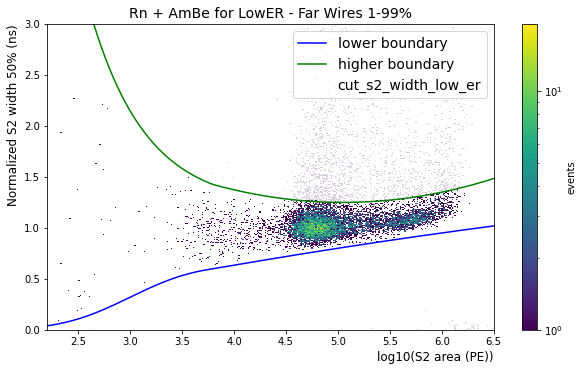

In [20]:
quantile_par = (( 0.63734546, 2.99678884, 1.03246656 ), ( 4.43451121, 1.84825809, 2.15736571, 1.2112417 ) )
parabola_par = ((-0.00798012,  0.23778128, -0.1894035), (0.11170658, -1.12877236,  4.10119736) )
plot_cut_s2_wdith(ev,quantile_par,parabola_par, arange = (2.2,6.5), wrange = (0,3),
                  wires = 'far', title = 'Rn + AmBe for LowER - Far Wires 1-99%',
                  cut='cut_s2_width_low_er')